In [1]:
import os

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/data-preprocessing/train_pngs/regions_metadata.csv")
label_map = {"Non-mitosis": 0, "Mitosis": 1}
train = pd.read_csv("/kaggle/input/data-preprocessing/train_pngs/regions_metadata.csv")
train["Label"] = train["label"].map(label_map)
train["Study"] = train["filename"].apply(lambda x: x.split("_")[0])

In [3]:
test = pd.read_csv("/kaggle/input/data-preprocessing-ts-one-shot-v2/test_pngs/regions_metadata.csv")
test["Image ID"] = test["filename"].apply(lambda x: x.split("_")[0])
test["Image ID"] = test["Image ID"].astype(int)
test["Label ID"] = test["label"].apply(lambda x: x.split("_")[0])
test

,filename,original_json,label,bbox,region_size,Image ID,Label ID
0,0074_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[165, 340, 223, 394]","(58, 54)",74,Blank1
1,0074_1.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank2,"[239, 413, 290, 465]","(51, 52)",74,Blank2
2,0077_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[232, 196, 284, 247]","(52, 51)",77,Blank1
3,0058_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[43, 425, 97, 472]","(54, 47)",58,Blank1
4,0053_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[271, 127, 330, 177]","(59, 50)",53,Blank1
...,...,...,...,...,...,...,...
132,0086_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[281, 364, 346, 417]","(65, 53)",86,Blank1
133,0086_1.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank2,"[156, 170, 206, 223]","(50, 53)",86,Blank2
134,0086_2.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank3,"[295, 83, 343, 130]","(48, 47)",86,Blank3
135,0001_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[449, 126, 486, 162]","(37, 36)",1,Blank1


In [4]:
sub = pd.read_csv("/kaggle/input/glioma-mdc2025-oneshot-sub/submission_template.csv")
test = pd.merge(sub, test, on=["Image ID", "Label ID"])
test["filename"].isnull().sum()
test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Row ID,Image ID,Label ID,Prediction,filename,original_json,label,bbox,region_size
0,1,1,Blank1,NaN,0001_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[449, 126, 486, 162]","(37, 36)"
1,2,1,Blank2,NaN,0001_1.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank2,"[66, 141, 108, 180]","(42, 39)"
2,3,2,Blank1,NaN,0002_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[311, 50, 351, 93]","(40, 43)"
3,4,2,Blank2,NaN,0002_1.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank2,"[367, 374, 404, 412]","(37, 38)"
4,5,3,Blank1,NaN,0003_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[381, 122, 420, 163]","(39, 41)"
...,...,...,...,...,...,...,...,...,...
132,133,92,Blank1,NaN,0092_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[13, 233, 66, 285]","(53, 52)"
133,134,93,Blank1,NaN,0093_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[433, 220, 481, 263]","(48, 43)"
134,135,94,Blank1,NaN,0094_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[146, 333, 193, 379]","(47, 46)"
135,136,95,Blank1,NaN,0095_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[128, 221, 194, 277]","(66, 56)"


In [5]:
test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Row ID,Image ID,Label ID,Prediction,filename,original_json,label,bbox,region_size
0,1,1,Blank1,NaN,0001_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[449, 126, 486, 162]","(37, 36)"
1,2,1,Blank2,NaN,0001_1.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank2,"[66, 141, 108, 180]","(42, 39)"
2,3,2,Blank1,NaN,0002_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[311, 50, 351, 93]","(40, 43)"
3,4,2,Blank2,NaN,0002_1.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank2,"[367, 374, 404, 412]","(37, 38)"
4,5,3,Blank1,NaN,0003_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[381, 122, 420, 163]","(39, 41)"
...,...,...,...,...,...,...,...,...,...
132,133,92,Blank1,NaN,0092_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[13, 233, 66, 285]","(53, 52)"
133,134,93,Blank1,NaN,0093_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[433, 220, 481, 263]","(48, 43)"
134,135,94,Blank1,NaN,0094_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[146, 333, 193, 379]","(47, 46)"
135,136,95,Blank1,NaN,0095_0.png,/kaggle/input/glioma-mdc-ts-one-shot/Oneshot_t...,Blank1,"[128, 221, 194, 277]","(66, 56)"


# Directory settings

In [6]:
# ====================================================
# Directory settings
# ====================================================
import os

OUTPUT_DIR = './'
MODEL_DIR = "/kaggle/input/glioma-mdc2025-convnext-base-tr-128/"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

TRAIN_PATH = '/kaggle/input/data-preprocessing/train_pngs/'
TEST_PATH = '/kaggle/input/data-preprocessing-ts-one-shot-v2/test_pngs/'

# CFG

In [7]:
# ====================================================
# CFG
# ====================================================
class CFG:
    debug=False
    apex=False
    print_freq=100
    num_workers=4
    model_name= 'convnextv2_base.fcmae_ft_in22k_in1k' #"tf_efficientnetv2_s.in21k_ft_in1k" #'tf_efficientnetv2_s.in21k_ft_in1k' #'convnextv2_tiny.fcmae_ft_in22k_in1k' #'tf_efficientnetv2_s.in21k_ft_in1k' #'resnext50_32x4d'
    size= 128
    scheduler='CosineAnnealingWarmRestarts' # ['ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=5
    #factor=0.2 # ReduceLROnPlateau
    #patience=4 # ReduceLROnPlateau
    #eps=1e-6 # ReduceLROnPlateau
    #T_max=10 # CosineAnnealingLR
    T_0=epochs # CosineAnnealingWarmRestarts
    lr=1e-4
    min_lr=1e-6
    batch_size=32
    weight_decay=1e-6
    gradient_accumulation_steps=1
    max_grad_norm=1000
    seed=42
    
    target_cols = ['Label']
    target_size= len(target_cols)
    target_col='target'
    n_fold=5
    trn_fold=[0,1,2,3,4]
    train=False
    inference=True
    
if CFG.debug:
    CFG.epochs = 1
    train = train.sample(n=1000, random_state=CFG.seed).reset_index(drop=True)

# Library

In [8]:
# ====================================================
# Library
# ====================================================
import sys
sys.path.append('../input/pytorch-image-models/pytorch-image-models-master')

import os
import math
import time
import random
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import StratifiedKFold, StratifiedGroupKFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

from albumentations import (
    Compose, OneOf, Normalize, Resize, RandomResizedCrop, RandomCrop, HorizontalFlip, VerticalFlip, 
    RandomBrightnessContrast, Rotate, ShiftScaleRotate, Transpose
    )
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

import timm

import warnings 
warnings.filterwarnings('ignore')

if CFG.apex:
    from apex import amp

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# Utils

In [9]:
# ====================================================
# Utils
# ====================================================
def get_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


@contextmanager
def timer(name):
    t0 = time.time()
    LOGGER.info(f'[{name}] start')
    yield
    LOGGER.info(f'[{name}] done in {time.time() - t0:.0f} s.')


def init_logger(log_file=OUTPUT_DIR+'train.log'):
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = init_logger()


def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch(seed=CFG.seed)

# CV split

In [10]:
folds = train.copy()
Fold = StratifiedGroupKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds["Label"], folds["Study"])):
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
folds

,filename,original_json,label,is_mitosis,bbox,region_size,Label,Study,fold
0,training0967_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Non-mitosis,1,"[384, 183, 447, 250]","(63, 67)",0,training0967,0
1,training0991_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Non-mitosis,1,"[109, 397, 158, 445]","(49, 48)",0,training0991,0
2,training0676_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Mitosis,1,"[347, 411, 408, 461]","(61, 50)",1,training0676,0
3,training0325_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Non-mitosis,1,"[314, 415, 356, 455]","(42, 40)",0,training0325,0
4,training1027_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Non-mitosis,1,"[286, 242, 347, 308]","(61, 66)",0,training1027,2
...,...,...,...,...,...,...,...,...,...
1608,training0685_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Non-mitosis,1,"[328, 313, 385, 377]","(57, 64)",0,training0685,2
1609,training1421_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Mitosis,1,"[202, 190, 283, 258]","(81, 68)",1,training1421,0
1610,training0533_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Mitosis,1,"[85, 241, 151, 301]","(66, 60)",1,training0533,1
1611,training1182_0.png,/kaggle/input/glioma-mcd-2025/Glioma_MDC_2025_...,Non-mitosis,1,"[295, 240, 360, 315]","(65, 75)",0,training1182,4


In [11]:
folds["Label"].value_counts()

Label
1    898
0    715
Name: count, dtype: int64

# Dataset

In [12]:
import pydicom
# ====================================================
# Dataset
# ====================================================
class TrainDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_paths = df['filename'].values
        self.labels = df[CFG.target_cols].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_path = TRAIN_PATH + self.file_paths[idx]
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        label = torch.tensor(self.labels[idx]).float()
        return image, label
    

class TestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_paths = df['filename'].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_path = TEST_PATH + self.file_paths[idx]
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image

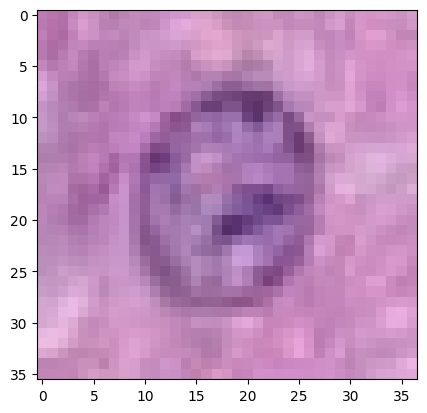

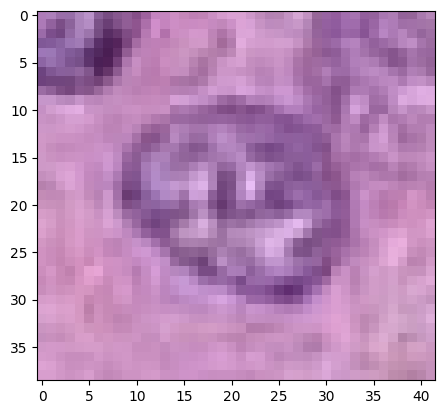

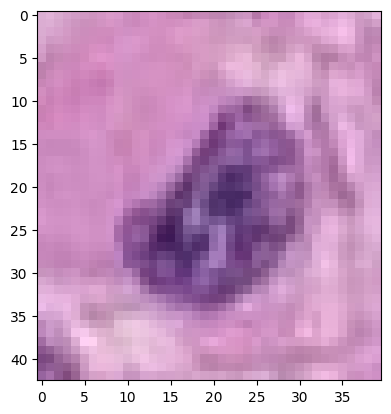

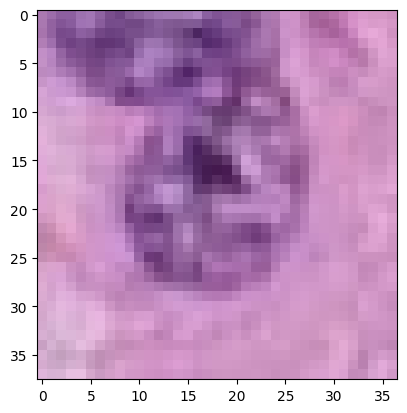

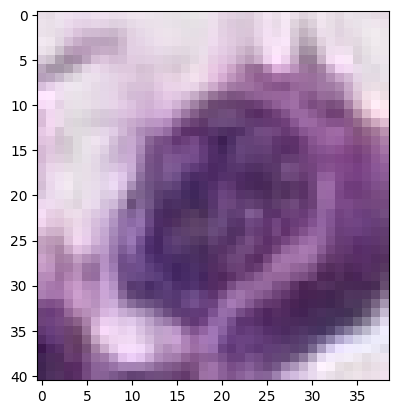

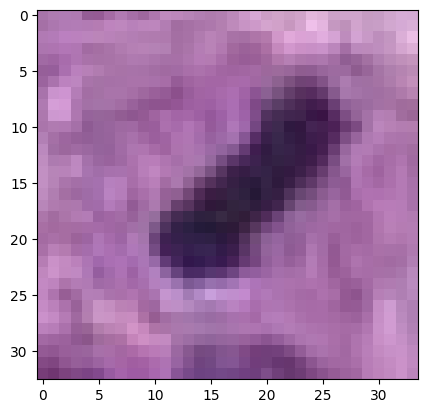

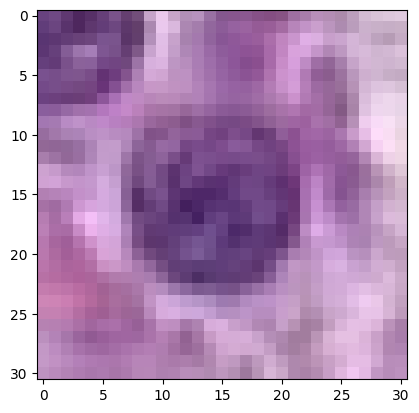

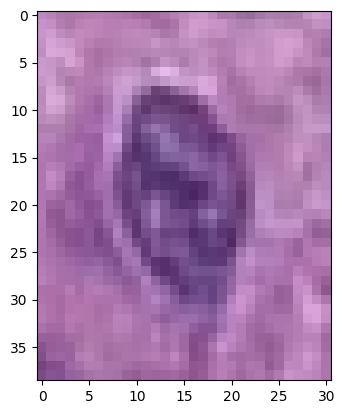

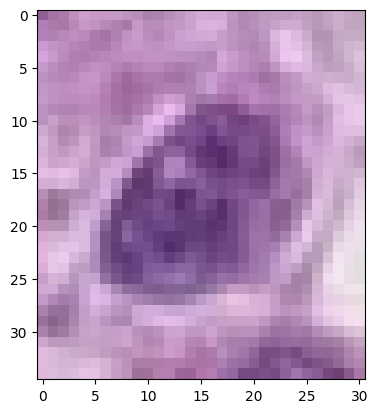

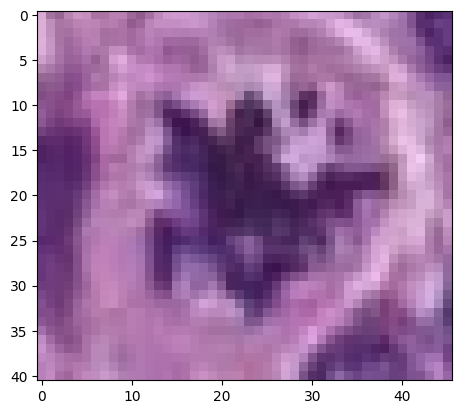

In [13]:
train_dataset = TestDataset(test, transform=None)

for i in range(10):
    image = train_dataset[i]
    plt.imshow(image)
    # plt.title(f'label: {label}')
    plt.show() 

# Transforms

In [14]:
# ====================================================
# Transforms
# ====================================================
def get_transforms(*, data):
    
    if data == 'train':
        return Compose([
            Resize(CFG.size, CFG.size),
            #RandomResizedCrop(CFG.size, CFG.size),
            Transpose(p=0.5),
            HorizontalFlip(p=0.5),
            VerticalFlip(p=0.5),
            ShiftScaleRotate(p=0.5),
            Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            ToTensorV2(),
        ])

    elif data == 'valid':
        return Compose([
            Resize(CFG.size, CFG.size),
            Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            ToTensorV2(),
        ])

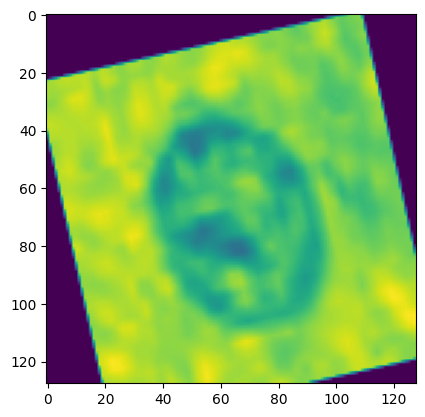

In [15]:
train_dataset = TestDataset(test, transform=get_transforms(data='train'))

for i in range(1):
    image = train_dataset[i]
    plt.imshow(image[0])
    # plt.title(f'label: {label}')
    plt.show() 

# MODEL

In [16]:
# ====================================================
# MODEL
# ====================================================
class CustomResNext(nn.Module):
    def __init__(self, model_name='resnext50_32x4d', pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        n_features = self.model.fc.in_features
        self.model.fc = nn.Linear(n_features, 1)

    def forward(self, x):
        x = self.model(x)
        return x

In [17]:
#model = CustomResNext(model_name=CFG.model_name, pretrained=False)
model = timm.create_model(model_name=CFG.model_name, num_classes=1)
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True,
                          num_workers=4, pin_memory=True, drop_last=True)

for image, label in train_loader:
    output = model(image)
    print(output)
    break

tensor([[0.8941],
        [0.5578],
        [0.7347],
        [1.0666]], grad_fn=<AddmmBackward0>)


# Helper functions

In [18]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))


def train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    for step, (images, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        y_preds = model(images)
        loss = criterion(y_preds, labels)
        # record loss
        losses.update(loss.item(), batch_size)
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        if CFG.apex:
            with amp.scale_loss(loss, optimizer) as scaled_loss:
                scaled_loss.backward()
        else:
            loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
            global_step += 1
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  #'LR: {lr:.6f}  '
                  .format(
                   epoch+1, step, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(train_loader)),
                   grad_norm=grad_norm,
                   #lr=scheduler.get_lr()[0],
                   ))
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()
    for step, (images, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        # compute loss
        with torch.no_grad():
            y_preds = model(images)
        loss = criterion(y_preds, labels)
        losses.update(loss.item(), batch_size)
        # record accuracy
        preds.append(y_preds.sigmoid().to('cpu').numpy())
        # preds.append(y_preds.to('cpu').numpy())
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(
                   step, len(valid_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(valid_loader)),
                   ))
    predictions = np.concatenate(preds)
    return losses.avg, predictions


def inference(model, states, test_loader, device):
    model.to(device)
    tk0 = tqdm(enumerate(test_loader), total=len(test_loader))
    probs = []
    for i, (images) in tk0:
        images = images.to(device)
        avg_preds = []
        for state in states:
            model.load_state_dict(state['model'])
            model.eval()
            with torch.no_grad():
                y_preds = model(images)
            avg_preds.append(y_preds.sigmoid().to('cpu').numpy())
        avg_preds = np.mean(avg_preds, axis=0)
        probs.append(avg_preds)
    probs = np.concatenate(probs)
    return probs

# Train loop

In [19]:
# ====================================================
# Train loop
# ====================================================
def train_loop(folds, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # loader
    # ====================================================
    trn_idx = folds[folds['fold'] != fold].index
    val_idx = folds[folds['fold'] == fold].index

    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)

    train_dataset = TrainDataset(train_folds, 
                                 transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds, 
                                 transform=get_transforms(data='valid'))

    train_loader = DataLoader(train_dataset, 
                              batch_size=CFG.batch_size, 
                              shuffle=True, 
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset, 
                              batch_size=CFG.batch_size, 
                              shuffle=False, 
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=False)
    
    # ====================================================
    # scheduler 
    # ====================================================
    def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='CosineAnnealingLR':
            scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

    # ====================================================
    # model & optimizer
    # ====================================================
    # model = CustomResNext(CFG.model_name, pretrained=True)
    model = timm.create_model(model_name=CFG.model_name, num_classes=CFG.target_size, pretrained=True)
    model.to(device)

    optimizer = Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay, amsgrad=False)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # apex
    # ====================================================
    if CFG.apex:
        model, optimizer = amp.initialize(model, optimizer, opt_level='O1', verbosity=0)

    # ====================================================
    # loop
    # ====================================================
    # criterion = nn.CrossEntropyLoss()
    criterion = nn.BCEWithLogitsLoss()

    best_score = 0.
    best_loss = np.inf
    
    for epoch in range(CFG.epochs):
        
        start_time = time.time()
        
        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        valid_labels = valid_folds[CFG.target_cols].values
        
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        # score = get_score(valid_labels, preds.argmax(1))

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        # LOGGER.info(f'Epoch {epoch+1} - Accuracy: {score}')

#         if score > best_score:
#             best_score = score
#             LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
#             torch.save({'model': model.state_dict(), 
#                         'preds': preds},
#                         OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best.pth')
            
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            LOGGER.info(f'Epoch {epoch+1} - Save Best Loss: {best_loss:.4f} Model')
            torch.save({'model': model.state_dict(), 
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth')
    
    check_point = torch.load(OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth')
    valid_folds[[str(c) for c in range(CFG.target_size)]] = check_point['preds']

    return valid_folds

In [20]:
# ====================================================
# main
# ====================================================
def main():

    """
    Prepare: 1.train  2.test  3.submission  4.folds
    """

    def get_result(result_df):
        preds = result_df['preds'].values
        labels = result_df[CFG.target_col].values
        score = get_score(labels, preds)
        LOGGER.info(f'Score: {score:<.5f}')
    
    if CFG.train:
        # train 
        oof_df = pd.DataFrame()
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df = train_loop(folds, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                # get_result(_oof_df)
        # CV result
        # LOGGER.info(f"========== CV ==========")
        # get_result(oof_df)
        # save result
        oof_df.to_csv(OUTPUT_DIR+'oof_df.csv', index=False)
    
    if CFG.inference:
        # inference
        model = timm.create_model(model_name=CFG.model_name, num_classes=1)
        states = [torch.load(MODEL_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth') for fold in CFG.trn_fold]
        print("Number of models:", len(states))
        test_dataset = TestDataset(test, transform=get_transforms(data='valid'))
        test_loader = DataLoader(test_dataset, batch_size=CFG.batch_size, shuffle=False, 
                                 num_workers=CFG.num_workers, pin_memory=True)
        predictions = inference(model, states, test_loader, device)
        # submission
        test['Probability'] = predictions
        test['Prediction'] = predictions > 0.5
        test['Prediction'] = test['Prediction'].astype(int)
        test[["Row ID", "Image ID", "Label ID", "Prediction"]].to_csv("submission.csv", index=False)
        test.to_csv("prediction.csv", index=False)

In [21]:
import gc

if __name__ == '__main__':
    torch.cuda.empty_cache()
    gc.collect()
    main()

Number of models: 5


  0%|          | 0/5 [00:00<?, ?it/s]